In [123]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

df = pd.read_csv("f1_prediction.csv")

In [124]:
df

,f1,precision,recall,between,above_between,miss,error,shadow
0,0.821468,0.930521,0.735294,0.044665,0.007444,0.027295,0.031628,0.037221
1,0.912568,0.951567,0.876640,0.071225,0.017094,0.022792,0.033508,0.000000
2,0.972292,0.987212,0.957816,0.035806,0.000000,0.035806,0.017466,0.000000
3,0.953291,0.971861,0.935417,0.036797,0.008658,0.021645,0.010956,0.000000
4,0.915825,0.868085,0.969121,0.034043,0.004255,0.023404,0.023481,0.004255
...,...,...,...,...,...,...,...,...
181,0.979221,0.976684,0.981771,0.020725,0.002591,0.018135,0.012194,0.002591
182,0.982347,0.969262,0.995789,0.016393,0.002049,0.004098,0.009384,0.008197
183,0.949254,0.979466,0.920849,0.022587,0.012320,0.012320,0.029063,0.010267
184,0.969072,0.990632,0.948430,0.032787,0.004684,0.023419,0.015770,0.023419


In [118]:
# y = np.log10(1 - df["f1"] + 1e-2)
y = df["f1"] 
X = df[["between", "miss", "error", "shadow"]]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
mae = np.mean(np.abs(y - y_pred))
mse = np.mean((y - y_pred) ** 2)

print(f"MAE: {mae:.4f}, MSE: {mse:.4f}")

for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print("intercept:", model.intercept_)

MAE: 0.0224, MSE: 0.0010
between: -0.6607903283221324
miss: -0.5518402627709131
error: -0.32216793174475333
shadow: -0.74385038669203
intercept: 0.9950128655273125


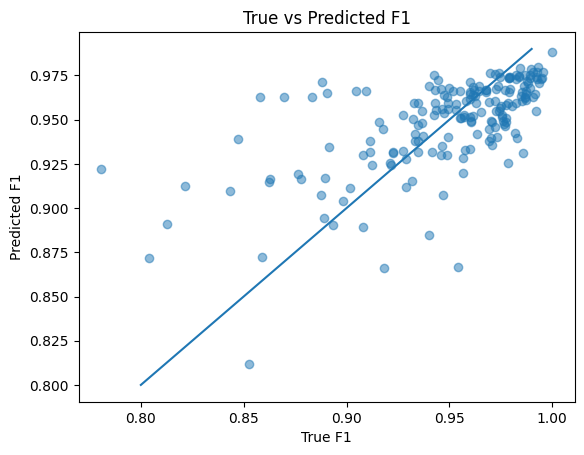

In [122]:
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("True F1")
plt.ylabel("Predicted F1")
plt.title("True vs Predicted F1")
plt.plot(np.arange(0.8, 1, 0.01), np.arange(0.8, 1, 0.01))
plt.show()

In [ ]:
scores = []
recalls = []
precisions = []
for p, gt, r, pr in zip(y_pred, y, df["recall"], df["precision"]):
    if p > 0.9688:
        scores.append(gt)
        recalls.append(r)
        precisions.append(pr)

np.median(scores), np.median(recalls), np.median(precisions), len(scores) / len(y)

(np.float64(0.9840848806366048),
 np.float64(0.9826302729528535),
 np.float64(0.9911242603550297),
 0.1989247311827957)

In [140]:
37 / 186

0.1989247311827957